<a href="https://colab.research.google.com/github/nescribal/cef/blob/master/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

Preparing the data

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#Same as above but using keras utils
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)


Define the model

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Apart 1000 samples to validate

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train the network for 20 epochs

In [7]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.5288 - accuracy: 0.5495 - val_loss: 1.6579 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3814 - accuracy: 0.7041 - val_loss: 1.3061 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0473 - accuracy: 0.7674 - val_loss: 1.1305 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8277 - accuracy: 0.8226 - val_loss: 1.0363 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6559 - accuracy: 0.8618 - val_loss: 0.9748 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5235 - accuracy: 0.8885 - val_loss: 0.9270 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4231 - accuracy: 0.9102 - val_loss: 0.9068 - val_accuracy: 0.8130
Epoch 8/20
16

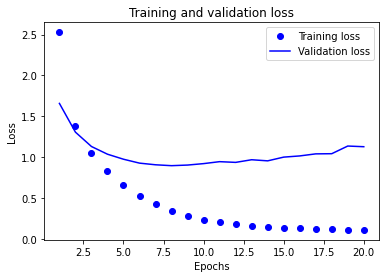

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

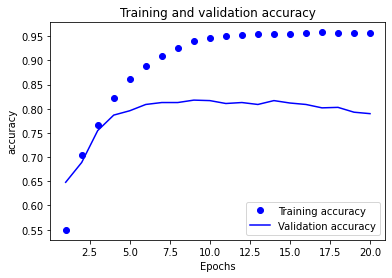

In [9]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [11]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 0.0937 - accuracy: 0.9584 - val_loss: 1.2217 - val_accuracy: 0.7960
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 0.0933 - accuracy: 0.9582 - val_loss: 1.3284 - val_accuracy: 0.7780
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 0.0934 - accuracy: 0.9587 - val_loss: 1.2150 - val_accuracy: 0.7990
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.0924 - accuracy: 0.9585 - val_loss: 1.2700 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.0895 - accuracy: 0.9579 - val_loss: 1.3260 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.0890 - accuracy: 0.9604 - val_loss: 1.2288 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.0901 - accuracy: 0.9597 - val_loss: 1.2740 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

[1.5391076803207397, 0.7738201022148132]

In [12]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17898486197684774

In [15]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

3

Another way to encode the labels, cast as integer array

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

#Same as previous but change the loss function. It is the same function
#but a different interface

model.compile(optimizer='rmsprop',
              loss='sparce_categorical_crossentropy',
              metrics=['accuracy'])